In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(url, names=names)

In [119]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

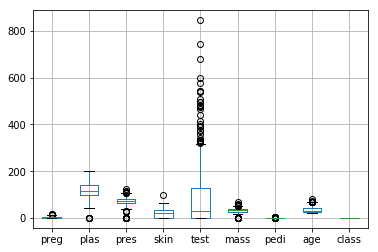

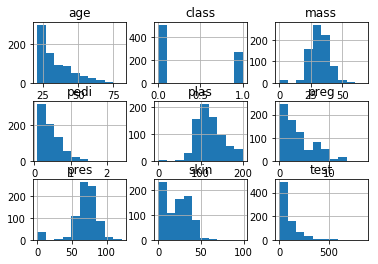

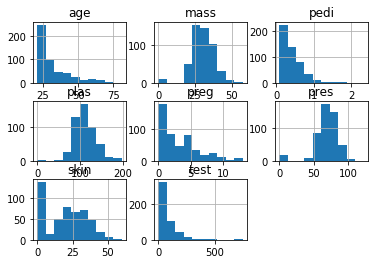

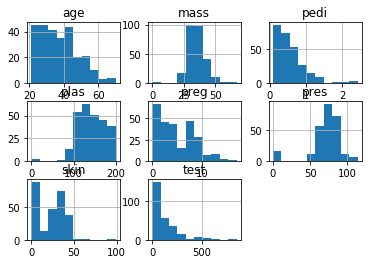

In [17]:
df.boxplot()
df.hist()
df.groupby('class').hist()

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: plas, dtype: object

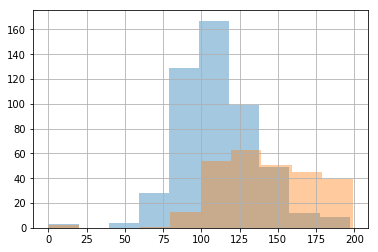

In [19]:
df.groupby('class').plas.hist(alpha=0.4)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

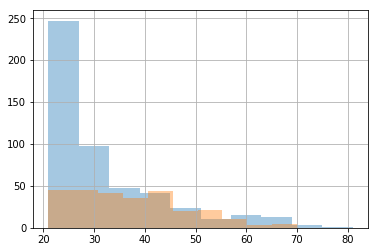

In [22]:
df.groupby('class').age.hist(alpha=0.4)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: preg, dtype: object

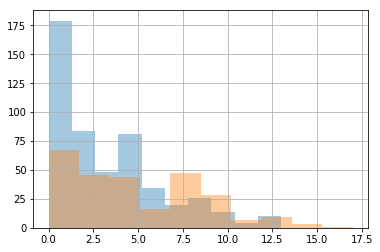

In [26]:
df.groupby('class').preg.hist(alpha=0.4)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mass, dtype: object

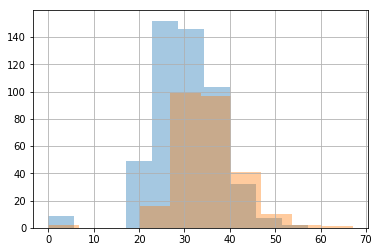

In [27]:
df.groupby('class').mass.hist(alpha=0.4)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: skin, dtype: object

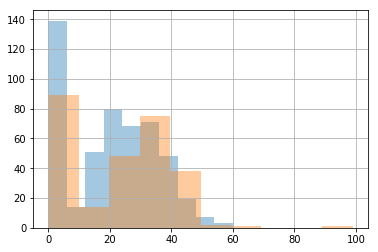

In [28]:
df.groupby('class').skin.hist(alpha=0.4)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pedi, dtype: object

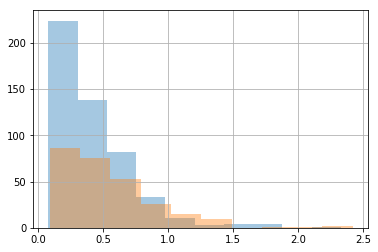

In [29]:
df.groupby('class').pedi.hist(alpha=0.4)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pres, dtype: object

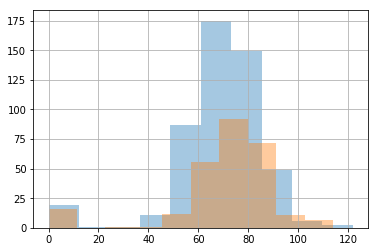

In [35]:
df.groupby('class').pres.hist(alpha=0.4)

In [97]:
def stratified_split(y, proportion=0.8):
    y = np.array(y)

    train_inds = np.zeros(len(y), dtype=bool)
    test_inds = np.zeros(len(y), dtype=bool)

    values = np.unique(y)
    for value in values:
        value_inds = np.nonzero(y == value)[0]
        np.random.shuffle(value_inds)

        n = int(proportion * len(value_inds))

        train_inds[value_inds[:n]] = True
        test_inds[value_inds[n:]] = True

    return train_inds, test_inds

In [98]:
train, test = stratified_split(df['class'])

In [99]:
X_train = df.iloc[train, 0:8]
X_test = df.iloc[test, 0:8]

In [100]:
y_train = df['class'][train]
y_test = df['class'][test]

In [101]:
X_train.shape

(614, 8)

In [102]:
X_test.shape

(154, 8)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [73]:
def accuracy(y_test, y_pred):
    return 1 - sum(abs(y_test - y_pred)/len(y_test))


print(accuracy(y_test, y_pred))

0.7662337662337662


In [74]:
def norm_arr(arr):
    mean = arr.mean()
    std = arr.std()

    normalized = (arr - mean) / std
    return normalized


In [75]:
def norm_df(df):
    result = df.copy()

    for feature in df.columns:
        result[feature] = norm_arr(result[feature])

    return result

In [76]:
X_train = norm_df(df.iloc[train, 0:8])
X_test = norm_df(df.iloc[test, 0:8])

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [78]:
def accuracy(y_test, y_pred):
    return 1 - sum(abs(y_test - y_pred)/len(y_test))


print(accuracy(y_test, y_pred))

0.7727272727272727


In [79]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [86]:
X_train = df.iloc[train, 0:8]
X_test = df.iloc[test, 0:8]

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy(y_test, y_pred)

0.7272727272727273

In [87]:
X_train = norm_df(df.iloc[train, 0:8])
X_test = norm_df(df.iloc[test, 0:8])

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy(y_test, y_pred)

0.7337662337662337

In [120]:
def CV(df, classifier, nfold, norm=True):
    acc = []
    for i in range(nfold):
        y = df['class']
        train, test = stratified_split(y)

        if norm:
            X_train = norm_df(df.iloc[train, 0:8])
            X_test = norm_df(df.iloc[test, 0:8])
        else:
            X_train = df.iloc[train, 0:8]
            X_test = df.iloc[test, 0:8]

        y_train = y[train]
        y_test = y[test]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        acc.append(accuracy(y_test, y_pred))

    return acc

In [121]:
logreg = LogisticRegression()
rf = RandomForestClassifier()

In [122]:
def mean_func(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [123]:
mean_func(CV(df, logreg, 10, norm=True))

0.7610389610389608

In [124]:
mean_func(CV(df, logreg, 10, norm=False))

0.7499999999999999

In [125]:
mean_func(CV(df, rf, 10, norm=True))

0.7655844155844155

In [126]:
mean_func(CV(df, rf, 10, norm=False))

0.7376623376623377